In [1]:
# Roboflow 설치
!pip install roboflow

# YOLOv8 설치
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.7/802.7 kB 7.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
 

In [2]:
# Roboflow API를 사용하여 데이터셋 다운로드
from roboflow import Roboflow
rf = Roboflow(api_key="S1EtPb2dI29rmxjT3Zr5")
project = rf.workspace("faizan-ali-bjbfp").project("jump_fall_combined")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.58, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Jump_Fall_Combined-3 in yolov8:: 100%|██████████| 4605/4605 [00:01<00:00, 3567.71it/s]


In [3]:
# PyTorch 및 기타 종속성 설치
import torch
import torchvision
import ultralytics
from google.colab import files
import os

# YOLOv8 확인
from ultralytics import YOLO
print(YOLO)

<class 'ultralytics.models.yolo.model.YOLO'>


In [5]:
# 모델 생성
model = YOLO('yolov8n-pose.pt')  # 프리트레인 모델 사용


# 데이터 경로 설정
data_path = dataset.location+"/data.yaml"


# 학습
model.train(data=data_path, epochs=50, imgsz=640, project='runs/my_project', name='pose_estimation')

100%|██████████| 6.52M/6.52M [00:00<00:00, 115MB/s]


Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=/content/Jump_Fall_Combined-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/my_project, name=pose_estimation, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

100%|██████████| 755k/755k [00:00<00:00, 18.8MB/s]


Overriding model.yaml kpt_shape=[17, 3] with kpt_shape=[12, 3]
Overriding model.yaml nc=1 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True

100%|██████████| 6.25M/6.25M [00:00<00:00, 105MB/s]
Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/Jump_Fall_Combined-3/train/labels... 1954 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1954/1954 [00:01<00:00, 1442.63it/s]

train: New cache created: /content/Jump_Fall_Combined-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Jump_Fall_Combined-3/valid/labels... 344 images, 0 backgrounds, 0 corrupt: 100%|██████████| 344/344 [00:00<00:00, 619.60it/s]

val: New cache created: /content/Jump_Fall_Combined-3/valid/labels.cache


Plotting labels to runs/my_project/pose_estimation/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/my_project/pose_estimation
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/123 [00:00<?, ?it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
       1/50      2.71G      1.313      8.657     0.6831      2.682      1.543         29        640:  99%|█████████▉| 122/123 [01:04<00:00,  2.60it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
       1/50      2.75G      1.314      8.656     0.6821      2.686      1.548          2        640: 100%|██████████| 123/123 [01:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.48it/s]

                   all        344        346      0.557      0.503       0.47      0.252      0.168    0.00417   4.18e-05   4.18e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.44G      1.399      7.443     0.6367       2.16      1.574          5        640: 100%|██████████| 123/123 [00:51<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]


                   all        344        346      0.233      0.443       0.29      0.146     0.0083     0.0204   0.000891   0.000131

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.42G      1.481      7.266     0.6161      2.106      1.639          7        640: 100%|██████████| 123/123 [00:49<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]

                   all        344        346      0.317      0.707      0.454      0.259      0.373     0.0673     0.0125    0.00135



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.4G      1.494      7.003     0.6046      1.979      1.629          2        640: 100%|██████████| 123/123 [00:51<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.30it/s]

                   all        344        346       0.37      0.621      0.457      0.249     0.0205     0.0508    0.00521   0.000644



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.41G      1.475      7.021     0.5899      1.915      1.608          4        640: 100%|██████████| 123/123 [00:54<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.54it/s]

                   all        344        346      0.486      0.597      0.502      0.265     0.0471     0.0939     0.0188    0.00231



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.41G      1.423      6.932     0.5707      1.875      1.572          2        640: 100%|██████████| 123/123 [00:50<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:08<00:00,  1.28it/s]

                   all        344        346      0.573      0.519      0.494      0.289      0.212     0.0747     0.0258    0.00286



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.41G      1.435      6.731     0.5528      1.819      1.592          7        640: 100%|██████████| 123/123 [00:50<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.31it/s]

                   all        344        346      0.575      0.569      0.557      0.314       0.22     0.0859     0.0197    0.00247



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.4G      1.403      6.677     0.5376      1.781      1.559          5        640: 100%|██████████| 123/123 [00:50<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        344        346      0.617      0.566      0.602      0.325      0.213     0.0823     0.0189    0.00266



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.41G      1.409      6.504      0.525      1.746      1.552          5        640: 100%|██████████| 123/123 [00:54<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.71it/s]

                   all        344        346      0.612      0.598      0.611      0.357      0.243     0.0983     0.0355    0.00534



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.41G      1.376      6.537     0.5122      1.692      1.527          4        640: 100%|██████████| 123/123 [00:47<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.66it/s]

                   all        344        346      0.673      0.558      0.622      0.371      0.241      0.107     0.0364    0.00574



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.41G      1.364      6.458     0.5003       1.62      1.527          6        640: 100%|██████████| 123/123 [00:50<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.52it/s]

                   all        344        346      0.726      0.527      0.607      0.372      0.257      0.102     0.0367    0.00686



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.39G      1.339      6.426     0.4916      1.599      1.509          6        640: 100%|██████████| 123/123 [00:56<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        344        346      0.656      0.553      0.689      0.433      0.264     0.0929     0.0567    0.00982



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.41G      1.351      6.359     0.4733      1.588      1.499          3        640: 100%|██████████| 123/123 [00:49<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]

                   all        344        346       0.65      0.588      0.621      0.368      0.237      0.119     0.0362    0.00427



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.41G      1.328      6.285     0.4652      1.548        1.5          4        640: 100%|██████████| 123/123 [00:56<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.48it/s]

                   all        344        346      0.499      0.782      0.667      0.402     0.0778      0.141     0.0385    0.00528



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.41G       1.32      6.276     0.4688      1.528      1.477          7        640: 100%|██████████| 123/123 [00:51<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.77it/s]

                   all        344        346       0.57      0.743      0.688       0.42     0.0868      0.123     0.0386    0.00536



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.39G      1.333      6.262      0.462      1.515      1.496          2        640: 100%|██████████| 123/123 [00:49<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]

                   all        344        346      0.498      0.758      0.631      0.404      0.261      0.126     0.0521    0.00841



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.41G      1.315      6.086      0.453      1.474      1.485          7        640: 100%|██████████| 123/123 [00:51<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.55it/s]

                   all        344        346      0.489      0.799      0.663      0.428      0.101       0.15      0.058     0.0095



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.41G      1.278      6.051     0.4549      1.472      1.474          4        640: 100%|██████████| 123/123 [00:55<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        344        346      0.476      0.751      0.682       0.43      0.123      0.156     0.0755     0.0114



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.41G      1.277      5.973     0.4459      1.453      1.454          4        640: 100%|██████████| 123/123 [00:54<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.57it/s]

                   all        344        346      0.558      0.763      0.696      0.455      0.329      0.174     0.0864     0.0171



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.39G      1.266      5.933     0.4447      1.449      1.456          4        640: 100%|██████████| 123/123 [00:49<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.50it/s]

                   all        344        346      0.486      0.732      0.656      0.415     0.0971      0.154     0.0486    0.00948



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.41G      1.268      5.994     0.4461      1.401      1.456          3        640: 100%|██████████| 123/123 [00:50<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.68it/s]

                   all        344        346      0.561      0.732      0.718      0.468      0.359      0.158     0.0983     0.0182



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.41G      1.265      5.887     0.4388       1.41      1.464          6        640: 100%|██████████| 123/123 [00:54<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        344        346       0.66      0.747      0.773      0.494      0.223      0.196      0.128       0.02



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.41G      1.243      5.838     0.4321      1.349      1.429          4        640: 100%|██████████| 123/123 [00:49<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]

                   all        344        346      0.645      0.747      0.717      0.451      0.209      0.216     0.0989     0.0179



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.39G      1.244      5.786     0.4317      1.348       1.43          3        640: 100%|██████████| 123/123 [00:55<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.16it/s]

                   all        344        346      0.668      0.708      0.714      0.451      0.247      0.253      0.139     0.0276



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.41G      1.233      5.747     0.4369      1.321      1.428          6        640: 100%|██████████| 123/123 [00:49<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.60it/s]

                   all        344        346      0.645      0.699      0.691       0.44      0.208      0.247      0.094     0.0172



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.41G      1.233      5.687     0.4323      1.365      1.439          5        640: 100%|██████████| 123/123 [00:50<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.73it/s]

                   all        344        346      0.633      0.766      0.744       0.48      0.227      0.274      0.146      0.025



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.41G      1.206      5.678     0.4279      1.287      1.406          6        640: 100%|██████████| 123/123 [00:54<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]

                   all        344        346      0.599      0.758      0.739      0.482       0.29      0.258      0.171     0.0293



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.39G      1.207      5.609     0.4368      1.292      1.421          4        640: 100%|██████████| 123/123 [00:55<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.60it/s]

                   all        344        346      0.633      0.794      0.769      0.505       0.21      0.242      0.126      0.023



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.41G      1.203      5.573     0.4302      1.257      1.417          3        640: 100%|██████████| 123/123 [00:51<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]

                   all        344        346      0.656      0.784      0.769      0.518      0.241      0.301      0.169     0.0275



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.41G      1.209      5.472     0.4251      1.272      1.414          5        640: 100%|██████████| 123/123 [00:52<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]

                   all        344        346       0.72      0.689      0.763      0.497      0.315      0.296      0.192     0.0338



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.41G      1.181      5.508     0.4219      1.242      1.404          4        640: 100%|██████████| 123/123 [00:54<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.68it/s]

                   all        344        346      0.625      0.708        0.7      0.465      0.291      0.297      0.152     0.0255



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.39G      1.165      5.547     0.4241       1.21      1.388          3        640: 100%|██████████| 123/123 [00:55<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        344        346       0.67      0.793      0.802      0.535      0.277      0.298      0.191     0.0367



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.41G       1.16      5.454     0.4258      1.188      1.391          4        640: 100%|██████████| 123/123 [00:51<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.54it/s]

                   all        344        346       0.62      0.784      0.723      0.486       0.33       0.26      0.146     0.0284



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.4G      1.172      5.414     0.4258      1.181      1.386          2        640: 100%|██████████| 123/123 [00:51<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        344        346      0.677      0.712      0.751      0.504      0.308      0.265      0.189     0.0356



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.4G      1.149      5.348     0.4187      1.203      1.379          2        640: 100%|██████████| 123/123 [00:50<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.46it/s]

                   all        344        346      0.733      0.776      0.806      0.535      0.307      0.328      0.201     0.0358



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.39G      1.133      5.306     0.4226      1.173      1.362          8        640: 100%|██████████| 123/123 [00:47<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:08<00:00,  1.33it/s]

                   all        344        346      0.747      0.736      0.809      0.547      0.343      0.267      0.193     0.0355



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.41G       1.14      5.312     0.4151      1.136      1.365          8        640: 100%|██████████| 123/123 [00:51<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.72it/s]

                   all        344        346      0.663      0.757      0.747      0.504      0.348      0.301      0.185     0.0357



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.41G      1.119      5.317     0.4184      1.119      1.351          7        640: 100%|██████████| 123/123 [00:47<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.38it/s]

                   all        344        346      0.636      0.779      0.752      0.507      0.307      0.275      0.198     0.0414



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.41G      1.124      5.291      0.421       1.11      1.357          5        640: 100%|██████████| 123/123 [00:51<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.52it/s]

                   all        344        346      0.698      0.715      0.759       0.51      0.297      0.255       0.17     0.0349



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.39G      1.132      5.245     0.4172       1.13      1.353          4        640: 100%|██████████| 123/123 [00:47<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.47it/s]

                   all        344        346      0.663      0.771      0.761      0.515      0.283      0.344      0.194     0.0381


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.54G      1.027      5.289     0.2641     0.7877        1.4          2        640: 100%|██████████| 123/123 [00:53<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]

                   all        344        346       0.67      0.761      0.789      0.525      0.307      0.301      0.188     0.0377



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.41G      1.017      5.212     0.2529     0.7204      1.391          2        640: 100%|██████████| 123/123 [00:45<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]

                   all        344        346      0.712      0.799      0.799       0.54      0.312      0.335       0.21     0.0454



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.41G     0.9868       5.15     0.2559     0.6948      1.362          2        640: 100%|██████████| 123/123 [00:45<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        344        346      0.717       0.79      0.802      0.537      0.337      0.374       0.23     0.0484



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.39G     0.9815      5.103     0.2539     0.6815      1.346          2        640: 100%|██████████| 123/123 [00:53<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]

                   all        344        346      0.699      0.753      0.768       0.52      0.287      0.331      0.178     0.0388



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      45/50       2.4G     0.9688       5.08     0.2457     0.6653      1.339          2        640: 100%|██████████| 123/123 [00:51<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]

                   all        344        346      0.717      0.772      0.808       0.54      0.304       0.35      0.215      0.046



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      46/50       2.4G     0.9722      5.008     0.2454     0.6613       1.33          2        640: 100%|██████████| 123/123 [00:50<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]

                   all        344        346      0.695       0.78      0.784      0.531      0.324      0.303        0.2     0.0446



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      47/50       2.4G     0.9386      4.991     0.2462     0.6379      1.318          2        640: 100%|██████████| 123/123 [00:46<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.69it/s]

                   all        344        346       0.76       0.75      0.804      0.546      0.352      0.351      0.238     0.0515



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.39G     0.9276      4.943     0.2456     0.6155      1.312          2        640: 100%|██████████| 123/123 [00:49<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.57it/s]

                   all        344        346      0.778      0.742      0.802      0.553       0.36      0.336      0.237     0.0509



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      49/50       2.4G     0.9295      4.927     0.2484      0.613      1.319          2        640: 100%|██████████| 123/123 [00:46<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.13it/s]

                   all        344        346      0.725      0.765      0.792      0.539      0.336      0.378      0.238     0.0525



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      50/50       2.4G     0.9054      4.892     0.2514     0.6007      1.302          2        640: 100%|██████████| 123/123 [00:49<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]

                   all        344        346      0.757      0.759      0.802      0.548      0.352      0.364      0.238     0.0533



50 epochs completed in 0.810 hours.
Optimizer stripped from runs/my_project/pose_estimation/weights/last.pt, 6.6MB
Optimizer stripped from runs/my_project/pose_estimation/weights/best.pt, 6.6MB

Validating runs/my_project/pose_estimation/weights/best.pt...
Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-pose summary (fused): 187 layers, 3,191,174 parameters, 0 gradients, 8.8 GFLOPs


Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:12<00:00,  1.10s/it]


                   all        344        346      0.778      0.742      0.802      0.553       0.36      0.336      0.237     0.0511
                  fall         57         57      0.885      0.825      0.887      0.602       0.19      0.169     0.0657     0.0118
                  jump        104        104      0.905      0.894      0.958      0.682       0.18      0.173     0.0618    0.00913
                s_wall         47         48      0.669      0.625      0.638      0.411      0.426      0.375      0.291     0.0721
               sitting         40         40      0.887      0.975      0.969      0.709       0.62      0.675      0.495      0.125
              standing         52         53      0.746      0.499      0.694      0.496      0.286       0.17       0.14     0.0234
               walking         44         44      0.574      0.636      0.666      0.421       0.46      0.455       0.37     0.0656
Speed: 0.3ms preprocess, 3.8ms inference, 0.0ms loss, 6.4ms postproce

ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ec71daf75e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,  

In [6]:
# 모델 가중치 경로 설정
weights_dir = 'runs/my_project/pose_estimation/weights'
weights_file = os.path.join(weights_dir, 'best.pt')

In [8]:

# 테스트 이미지 경로
test_image_path = '/content/example.jpg'

# 추론
results = model(test_image_path)

# 결과 시각화
for result in results:
    result.show()


image 1/1 /content/example.jpg: 448x640 2 falls, 27.1ms
Speed: 4.8ms preprocess, 27.1ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)



image 1/1 /content/example.jpg: 448x640 2 falls, 57.7ms
Speed: 10.3ms preprocess, 57.7ms inference, 10.2ms postprocess per image at shape (1, 3, 448, 640)


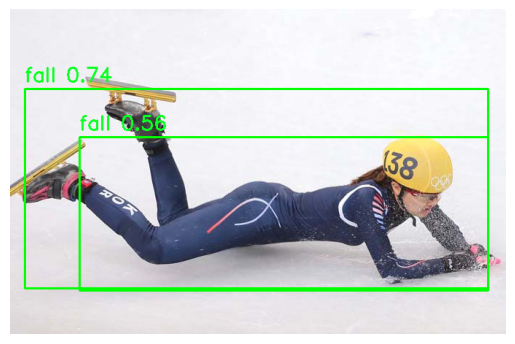

In [9]:
import cv2
import matplotlib.pyplot as plt

# 추론
results = model(test_image_path)

# OpenCV를 사용하여 이미지를 불러오기
image = cv2.imread(test_image_path)

# 결과를 이미지 위에 그리기
for result in results:
    # 각 객체에 대한 정보 추출
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = result.names[box.cls[0].item()]
        confidence = box.conf[0].item()

        # 박스 그리기
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # 레이블과 신뢰도 그리기
        cv2.putText(image, f'{label} {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

# OpenCV에서 이미지를 BGR에서 RGB로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 이미지를 표시
plt.imshow(image)
plt.axis('off')
plt.show()
